In [1]:
import pandas as pd # library to handle dataframes
import matplotlib # plots, visualization 
import matplotlib.pyplot as plt # library to plot graphics
import numpy as np # to handle matrices
import seaborn as sns # to build graphics
from scipy.stats import kurtosis, skew # statistics of numerical values
from scipy import stats # ststistical tests, statistical analysis 
from scipy.stats import linregress # for linear regression 
import re #regex
data = pd.read_json('winemag-data-130k-v2.json')


Let's explore wine data and see if anything needs to be cleaned 

In [2]:
data.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [3]:
data.describe(include='all',).T # descriptive statistics for the data transposed to make it easier to read



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
points,129971.0,NaN,NaN,NaN,88.447138,3.03973,80.0,86.0,88.0,91.0,100.0
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,120975.0,NaN,NaN,NaN,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,129970,707,Pinot Noir,13272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there are some NaN values, let's see how many 

In [4]:
# how many NaN values are in data 
total_null_values = data.isna().sum().sum() 
print('Total null values:', total_null_values)

Total null values: 204752


In [5]:
complete_cases = len(data.dropna()) # number of rows of 
print('Complete cases:',complete_cases)

Complete cases: 22387


In [6]:
data.shape

(129971, 13)

In [7]:
data.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [8]:
# checking missing values 
data.isnull().sum()


points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

There are a lot of missing price values, which can be a problem for regression analysis. Let's see data types

In [9]:
# checking data types in the dataframe 
data.dtypes

points                     int64
title                     object
description               object
taster_name               object
taster_twitter_handle     object
price                    float64
designation               object
variety                   object
region_1                  object
region_2                  object
province                  object
country                   object
winery                    object
dtype: object

Prior to Imputation, I tried using linear Interpolation method.
It didn't work. I decided to try Interpolation instead.


In [10]:
# replacing missing values in 'price' column with the mean value
mean_price = data['price'].mean()
data['price'] = data['price'].fillna(mean_price)

# reseting index to ensure alignment
data.reset_index(drop=True, inplace=True)

In [11]:
# checking if imputation worked
data.isnull().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                        0
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

Now that we have no missing values in 'price' and 'points',
I can start doing some analysis.

In [13]:
best_grape_ratings = data.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)
best_grape_ratings # top 10 grapes used in most highly rated grapes


variety
Terrantez              95.000000
Tinta del Pais         95.000000
Gelber Traminer        95.000000
Bual                   94.142857
Sercial                94.000000
Riesling-Chardonnay    94.000000
Ramisco                93.000000
Garnacha-Cariñena      93.000000
Blauburgunder          93.000000
Muscadelle             92.500000
Name: points, dtype: float64

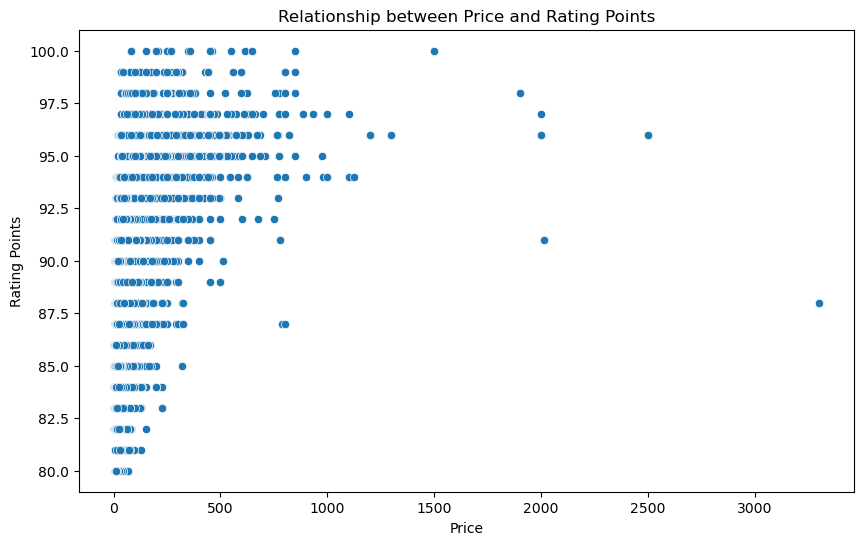

In [14]:
# scatter plot to visualize the relationship between the 'price'and'points'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='points', data=data)
plt.title('Relationship between Price and Rating Points')
plt.xlabel('Price')
plt.ylabel('Rating Points')
plt.show()



now lets do linear regression to see quantitive relationship between price and rating 

In [15]:
# linear regression
slope, intercept, r_value, p_value, std_err = linregress(data['price'], data['points'])

print("Slope:", slope)
print("Intercept:", intercept)
print("r_value:",r_value)
print("p_value:",p_value)
print("Standard error:",std_err)


Slope: 0.03088626191916605
Intercept: 87.35489530873592
r_value: 0.4021368826371607
p_value: 0.0
Standard error: 0.0001950597405255117


Slope: 0.03088626191916605  - for every one unit increase in 'price', the 'points' increase by 0.0309.

Intercept: 87.35489530873592 - the expected value of 'points' when 'price' is zero is 87.35, which is unlikely 

r_value: 0.4021368826371607 - correlation coefficientis indicates moderately positive linear relationship 

p_value: 0.0 - hypothesis test shows that correlation between price and poins is statistically significant 
Standard error: 0.0001950597405255117 - precision of the slope estimate


now let's find Pearson correlation coefficient between price and rating points to see relationship between 'price' and 'points'

In [16]:
# find Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(data['price'], data['points'])
pearson_corr


0.40213688263721514

Pearson correlation coefficient between price and rating points is 0.40213688263721514. It shows that linear relationship between 'price' and 'rating points' is moderately positive.
 
It  indicates a noticeable trend in the relationship between price and rating points

In [17]:
# top countries producing wines with the highest ratings

country_ratings = data.groupby('country')['points'].mean().sort_values(ascending=False)
top_countries_ratings = country_ratings.head(10)  # Get top 10 countries
top_countries_ratings


country
England       91.581081
India         90.222222
Austria       90.101345
Germany       89.851732
Canada        89.369650
Hungary       89.191781
China         89.000000
France        88.845109
Luxembourg    88.666667
Australia     88.580507
Name: points, dtype: float64

The result doesn't look right, lets try looking ata data with no outliers

In [18]:
# how many wines from each country is in dataframe
country_counts = data['country'].value_counts()

In [19]:
country_counts

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [20]:
# top 10 countries that produce more than 80  wines with the highest ratings
top_countries = country_counts[country_counts > 80].index
top_countries

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa',
       'Israel', 'Greece', 'Canada', 'Hungary', 'Bulgaria', 'Romania',
       'Uruguay', 'Turkey', 'Slovenia', 'Georgia'],
      dtype='object', name='country')

In [21]:
# filter out data that only includes wine from selected top countries
filtered_data = data[data['country'].isin(top_countries)]
filtered_data


,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,35.363389,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.000000,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.000000,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.000000,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.000000,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Anna Lee C. Iijima,None,28.000000,Brauneberger Juffer-Sonnenuhr Spätlese,Riesling,None,None,Mosel,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Paul Gregutt,@paulgwine,75.000000,None,Pinot Noir,Oregon,Oregon Other,Oregon,US,Citation
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Roger Voss,@vossroger,30.000000,Kritt,Gewürztraminer,Alsace,None,Alsace,France,Domaine Gresser
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Roger Voss,@vossroger,32.000000,None,Pinot Gris,Alsace,None,Alsace,France,Domaine Marcel Deiss


In [22]:
# average rating for each country for filtered data (top 10)
average_rating = filtered_data.groupby('country')['points'].mean()
top_10_countries = average_rating.sort_values(ascending=False).head(10)
                                                                

In [23]:
print("Top 10 countries producing more than 80 wines with the highest ratings:")
print(top_10_countries)


Top 10 countries producing more than 80 wines with the highest ratings:
country
Austria        90.101345
Germany        89.851732
Canada         89.369650
Hungary        89.191781
France         88.845109
Australia      88.580507
US             88.563720
Italy          88.562231
Israel         88.471287
New Zealand    88.303030
Name: points, dtype: float64


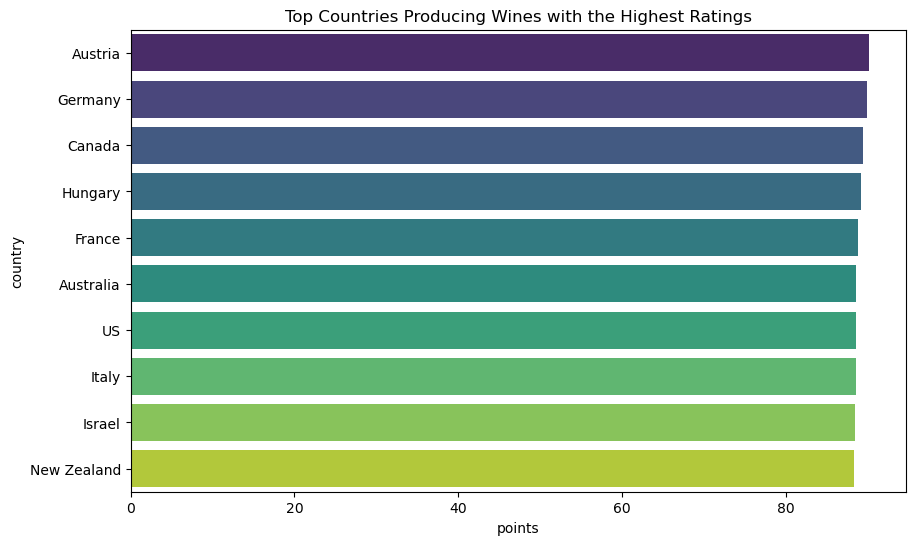

In [24]:
# bar plot for top countries producing wines with highest raitings

# top 10 countries that produce more than 80  wines with the highest ratings
top_countries = country_counts[country_counts > 80].index
# filter out data that only includes wine from selected top countries
filtered_data = data[data['country'].isin(top_countries)]

# group data by rating
avg_rating = filtered_data.groupby('country')['points'].mean().reset_index()
# sort countries by ratings 
avg_rating_sorted = avg_rating.sort_values(by='points', ascending=False)
# top 10 countries 
top_countries = avg_rating_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.title('Top Countries Producing Wines with the Highest Ratings')
plt.xlabel('Country')
plt.ylabel('Average Rating Points')
sns.barplot(x='points', y='country', data=top_countries, palette='viridis')
plt.xticks(rotation=360)
plt.show()

From this bar plot we can see top 10 countries producing highly rated wine

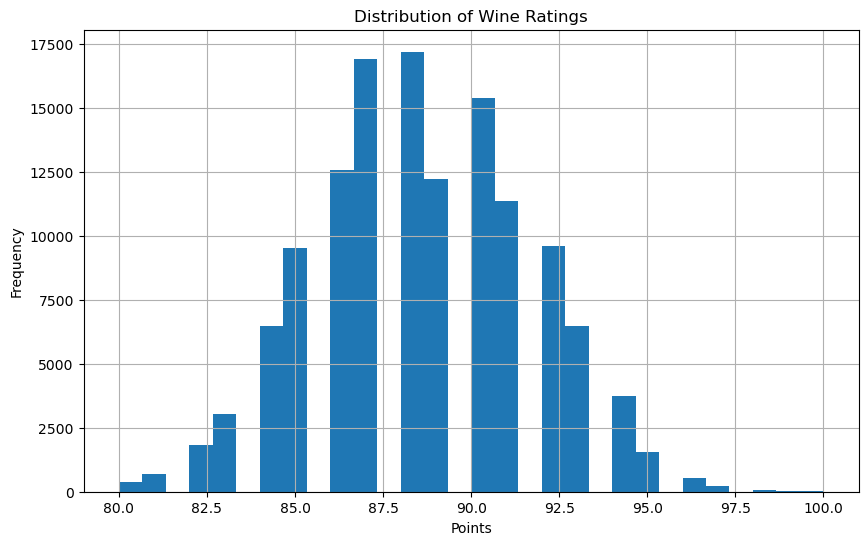

In [25]:
# plot a histogram showing the distribution of wine ratings
plt.figure(figsize=(10, 6))
plt.hist(data['points'], bins=30)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A bell-shaped histogram suggests that the wine ratings are well-distributed around a central value, with most ratings clustering near the center and fewer ratings at the extremes.

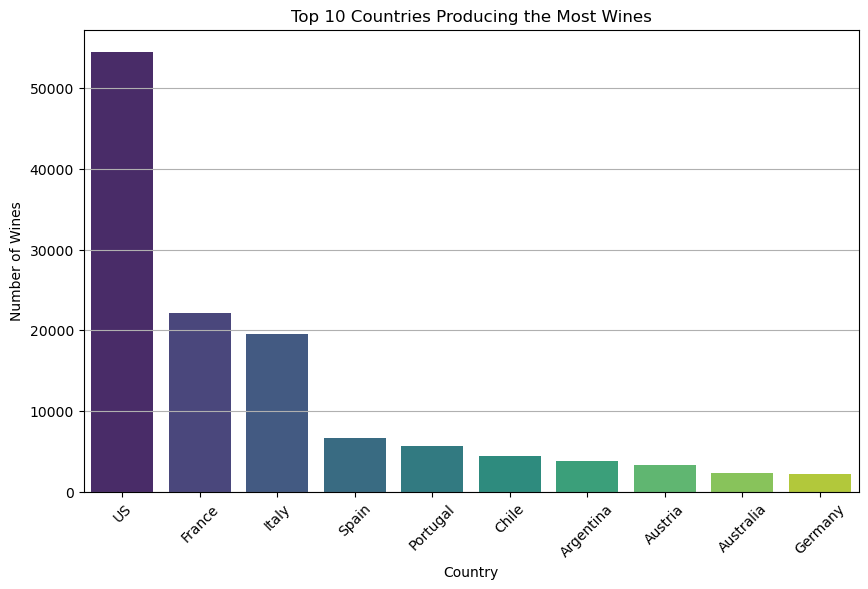

In [26]:
# bar chart for top 10 countries that produce the most wine
top_10_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
# set different color for each country 
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries Producing the Most Wines')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

From this bar plot we can see that US produces the most wines,
followed by France and Italy.

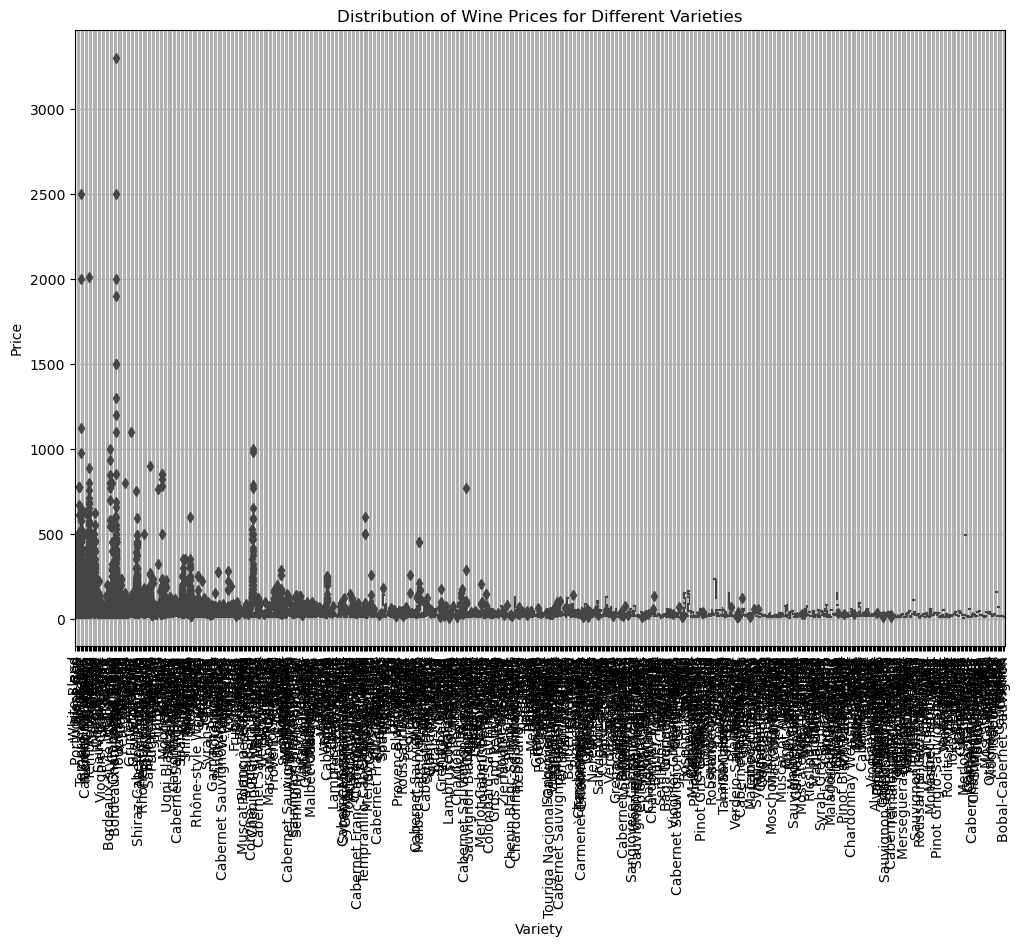

In [27]:
# box plot for distribution for different grape varieties 
plt.figure(figsize=(12, 8))
sns.boxplot(x='variety', y='price', data=data)
plt.title('Distribution of Wine Prices for Different Varieties')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


Plot looks too crowded, let's remove some varieties.

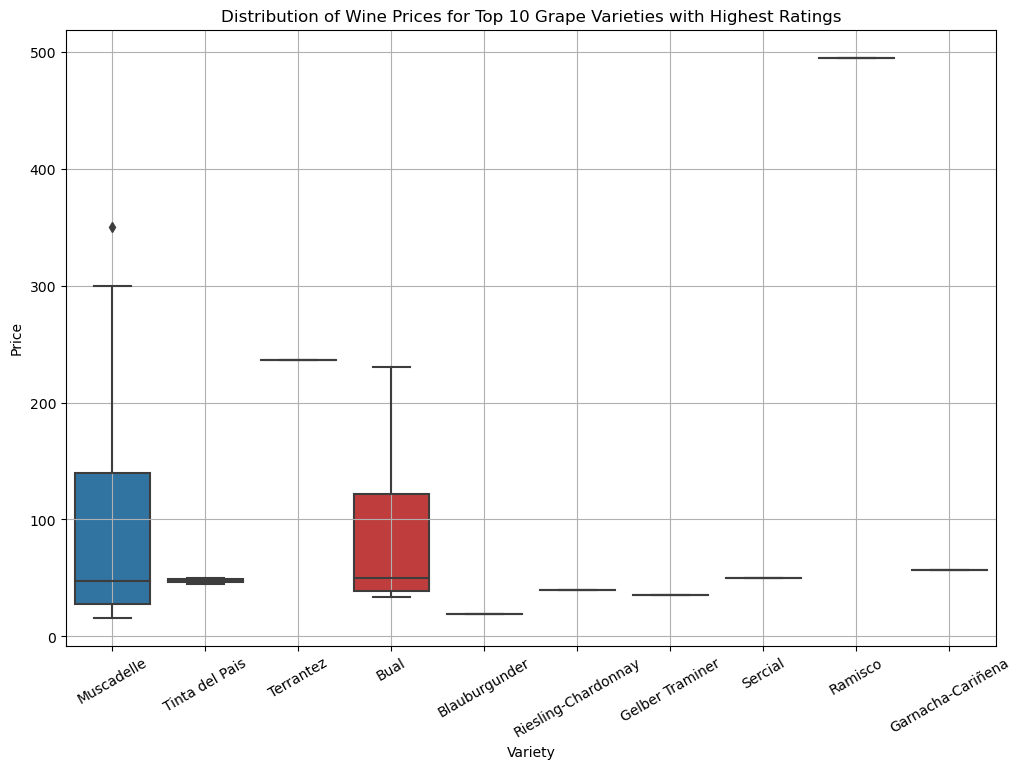

In [28]:
# box plot for top 10 grapes
top_10_grape_varieties = best_grape_ratings.index
filtered_data = data[data['variety'].isin(top_10_grape_varieties)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='variety', y='price', data=filtered_data)
plt.title('Distribution of Wine Prices for Top 10 Grape Varieties with Highest Ratings')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


plot looks inconclusive, so let's consider different top 10, without outliers

In [29]:
# frequency of each grape variety
grape_variety_counts = data['variety'].value_counts()

# 10 most popular grape varieties
top_10_popular_grapes = grape_variety_counts.head(10).index

# include only wines with the 10 most popular varieties
top_10_popular_grapes_data = data[data['variety'].isin(top_10_popular_grapes)]

# average rating for each variety within top 10 popular grapes
best_rated_within_top_10 = top_10_popular_grapes_data.groupby('variety')['points'].mean().sort_values(ascending=False)

best_rated_within_top_10 

variety
Riesling                    89.450183
Pinot Noir                  89.411468
Syrah                       89.286577
Bordeaux-style Red Blend    89.106435
Cabernet Sauvignon          88.607580
Red Blend                   88.380282
Chardonnay                  88.340083
Sauvignon Blanc             87.429636
Merlot                      87.208575
Rosé                        86.846240
Name: points, dtype: float64

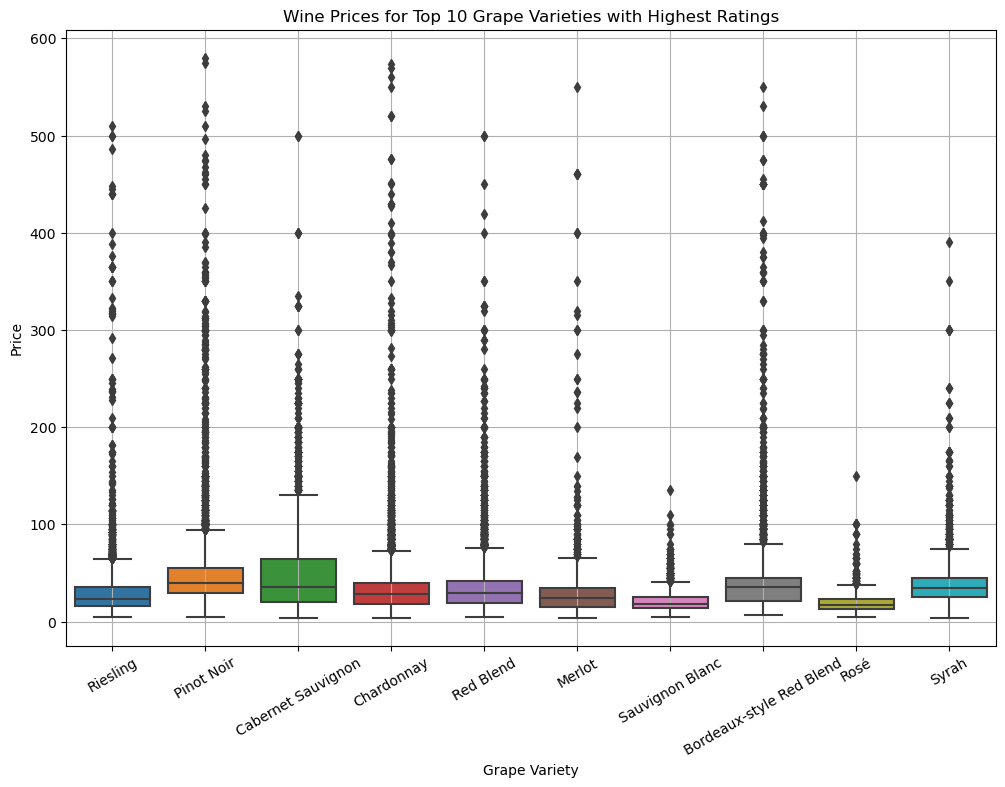

In [30]:
# plot a box plot for top 10 popular grapes 
top_10_popular_grapes_data = data[data['variety'].isin(top_10_popular_grapes)]
best_rated_grape_varieties = best_rated_within_top_10.index
filtered_data = top_10_popular_grapes_data[top_10_popular_grapes_data['variety'].isin(best_rated_grape_varieties)]
filtered_data = filtered_data[filtered_data['price'] < 600]
plt.figure(figsize=(12, 8))
sns.boxplot(x='variety', y='price', data=filtered_data)
plt.title('Wine Prices for Top 10 Grape Varieties with Highest Ratings')
plt.xlabel('Grape Variety')
plt.ylabel('Price')
plt.xticks(rotation=30)  # for better visibility 
plt.grid(True)
plt.show()

Let's consider looking at a different price range. 

In [31]:
# check how many expensive and affordable wines are there in the dataframe
num_expensive_wines = data[data['price'] > 400].shape[0]
num_affordable_wines = data[(data['price'] >= 0) & (data['price'] <= 100)].shape[0]
num_expensive_wines

179

In [ ]:
num_affordable_wines

In [32]:
# find z_scores to identify outliers in 'price'
z_scores = (data['price'] - data['price'].mean()) / data['price'].std()
np.mean(z_scores)



-1.716616930151122e-17

Z-scores are very close to zero on average, so the values in the 'price' column are centered around the mean of the distribution.(standard normal distribution)

In [33]:
np.std(z_scores)

0.9999961529805238

variation of the Z-scores is close to 1 which is expected in standard normal distribution.

In [34]:
# define a threshold for identifying outliers
# points that are more than 3 standard deviations away from the mean
# threshold is predetermined
threshold = 3
# filter data to include only rows with outliers 
outliers = data[np.abs(z_scores) > threshold]
outliers.shape

(1217, 13)

Now, let's look at a different box plot

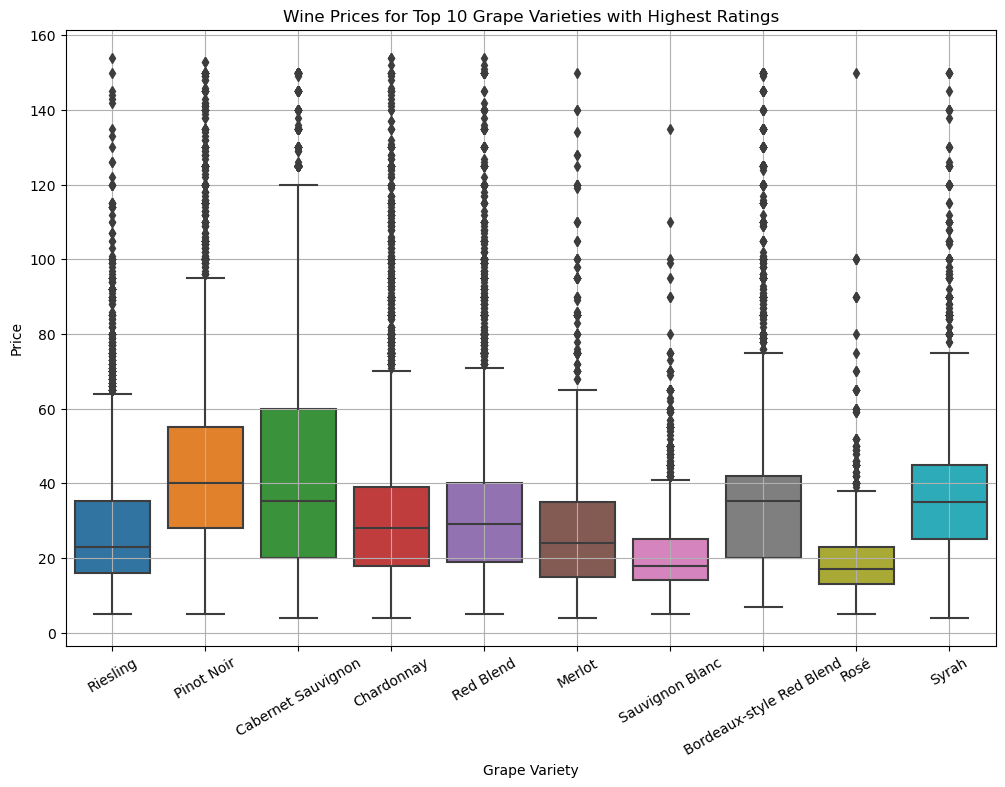

In [35]:
# box plot for wine prices for top 10 grape varieties, without outliers
top_10_popular_grapes_data = data[data['variety'].isin(top_10_popular_grapes)]
best_rated_grape_varieties = best_rated_within_top_10.index
filtered_data = top_10_popular_grapes_data[top_10_popular_grapes_data['variety'].isin(best_rated_grape_varieties)]
filtered_data = filtered_data[~filtered_data.index.isin(outliers.index)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='variety', y='price', data=filtered_data)
plt.title('Wine Prices for Top 10 Grape Varieties with Highest Ratings')
plt.xlabel('Grape Variety')
plt.ylabel('Price')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


Now it's easier to see price ranges and means for each grape variety.

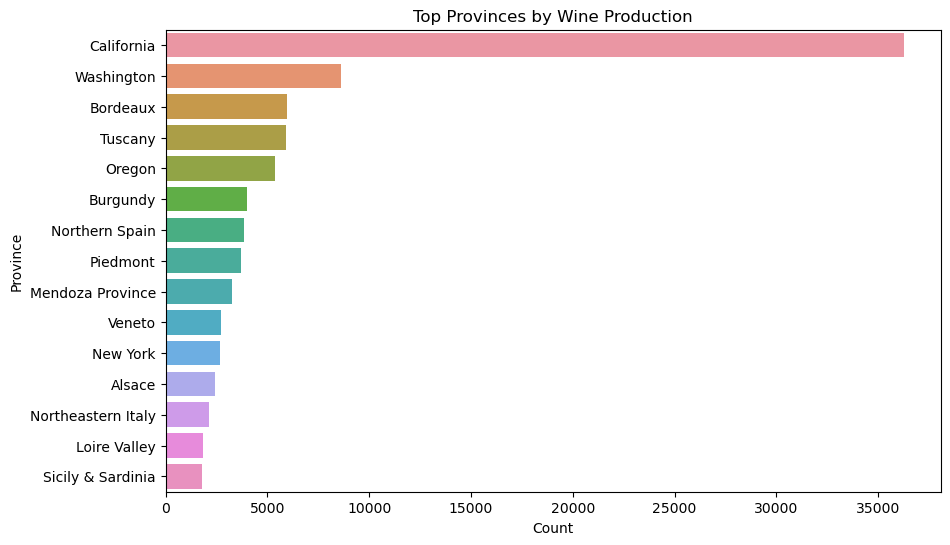

In [36]:
# use countplot to show top 15 provinces in wine production 
plt.figure(figsize=(10, 6))
sns.countplot(y='province', data=data, order=data['province'].value_counts().index[:15])
plt.title('Top Provinces by Wine Production')
plt.xlabel('Count')
plt.ylabel('Province')
plt.show()


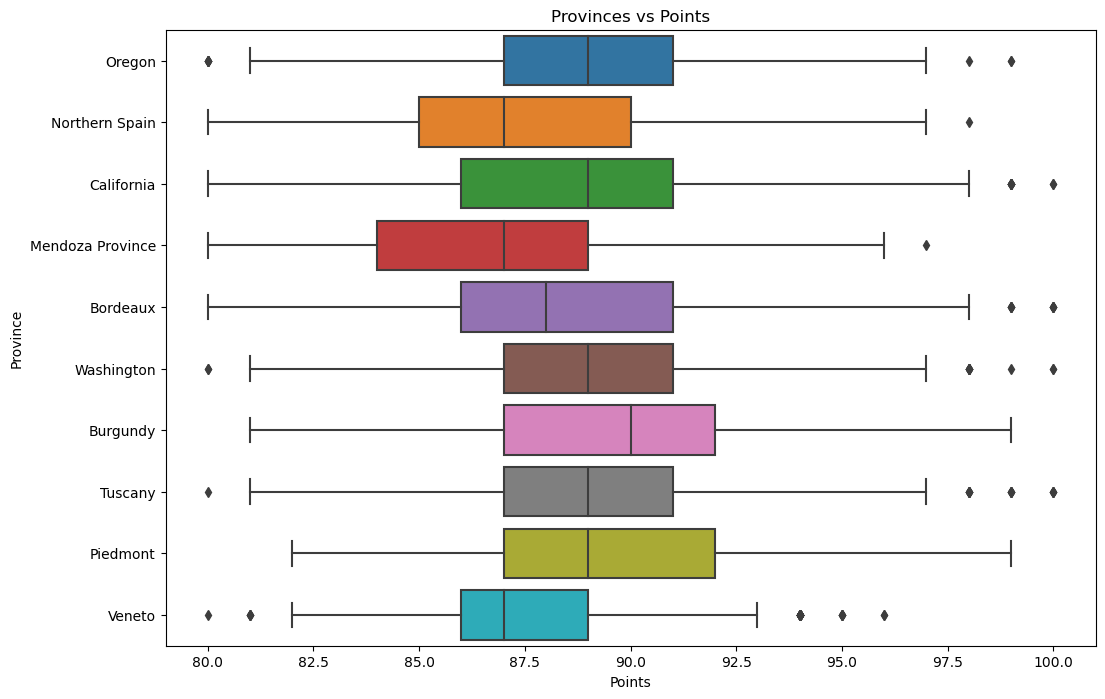

In [37]:
# box plot to show point average for top 10 provinces
plt.figure(figsize=(12, 8))
# use boolean indexing to filter data to get rows with most popular provinces
sns.boxplot(x='points', y='province', data=data[data['province'].isin(data['province'].value_counts().index[:10])])
plt.title('Provinces vs Points')
plt.xlabel('Points')
plt.ylabel('Province')
plt.show()

In [ ]:
Burgundy Province has highest mean points.

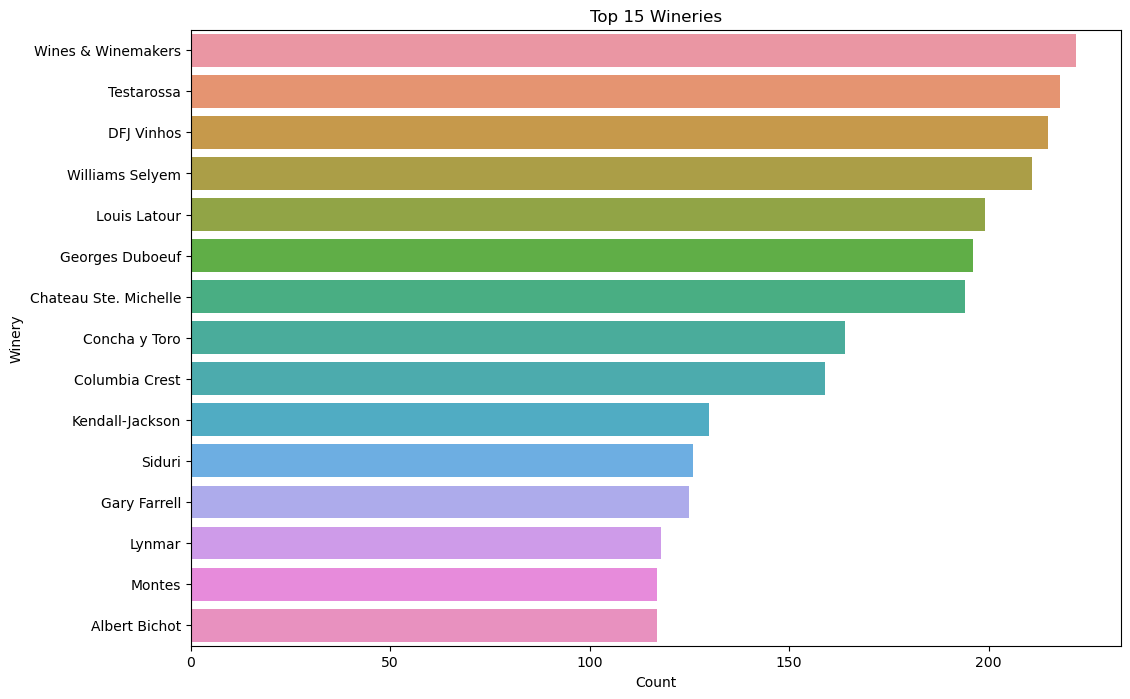

In [38]:
# plot top 15 wineries that produce most wines
plt.figure(figsize=(12, 8))
sns.countplot(y='winery', data=data, order=data['winery'].value_counts().index[:15])
plt.title('Top 15 Wineries')
plt.xlabel('Count')
plt.ylabel('Winery')
plt.show()


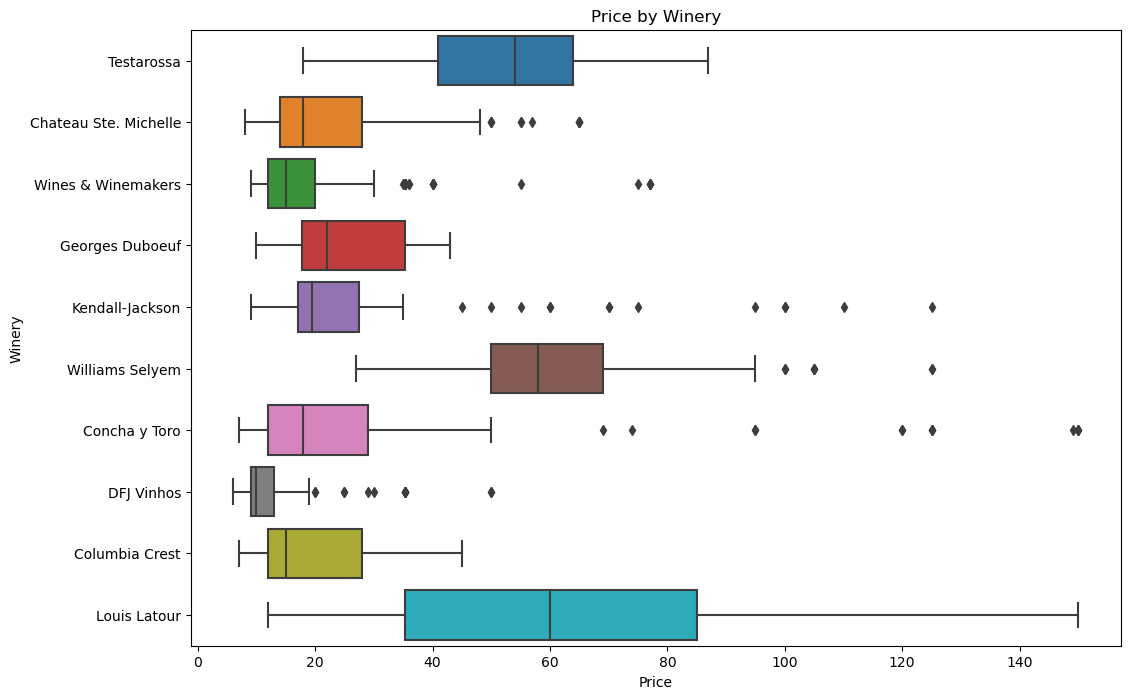

In [39]:
# box plot of prices by winery, where price ranges from 0 to 150 for top 10 wineries
filtered_data = data[(data['price'] >= 0) & (data['price'] <= 150) & (data['winery'].isin(data['winery'].value_counts().index[:10]))]
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='winery', data=filtered_data)
plt.title('Price by Winery')
plt.xlabel('Price')
plt.ylabel('Winery')
plt.show()

From this box plot we can see that Louis Latour has more expensive wines.

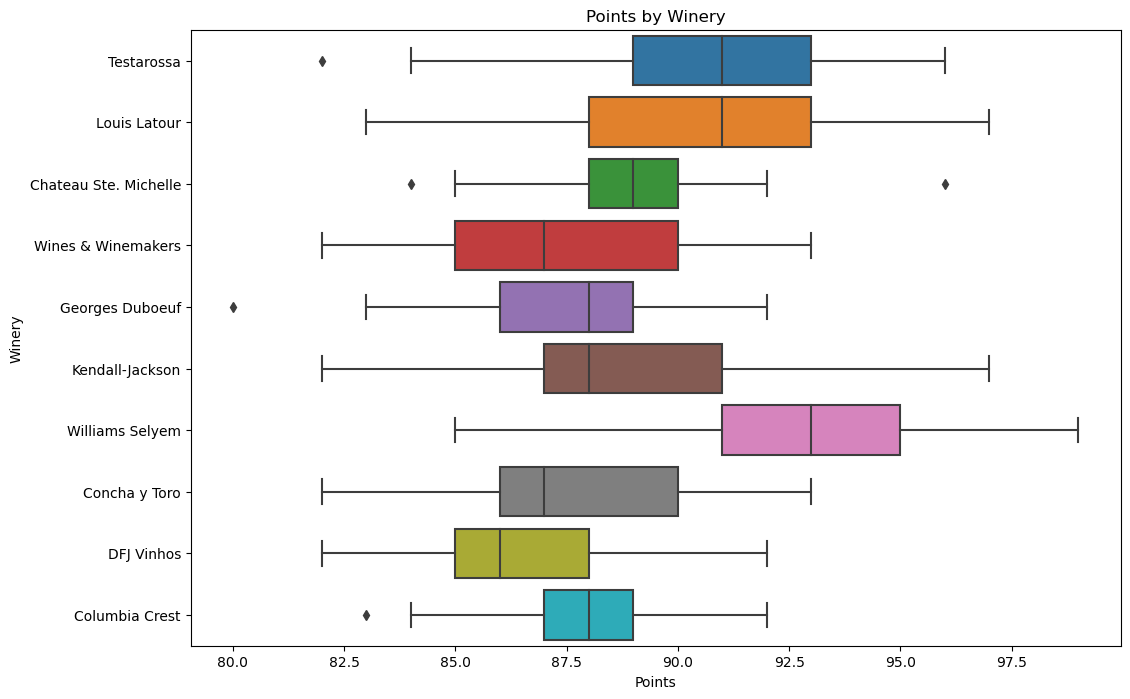

In [40]:
# box plot of points by top wineries 
plt.figure(figsize=(12, 8))
sns.boxplot(x='points', y='winery', data=data[data['winery'].isin(data['winery'].value_counts().index[:10])])
plt.title('Points by Winery')
plt.xlabel('Points')
plt.ylabel('Winery')
plt.show()


Williams Selyem winery has highest points mean

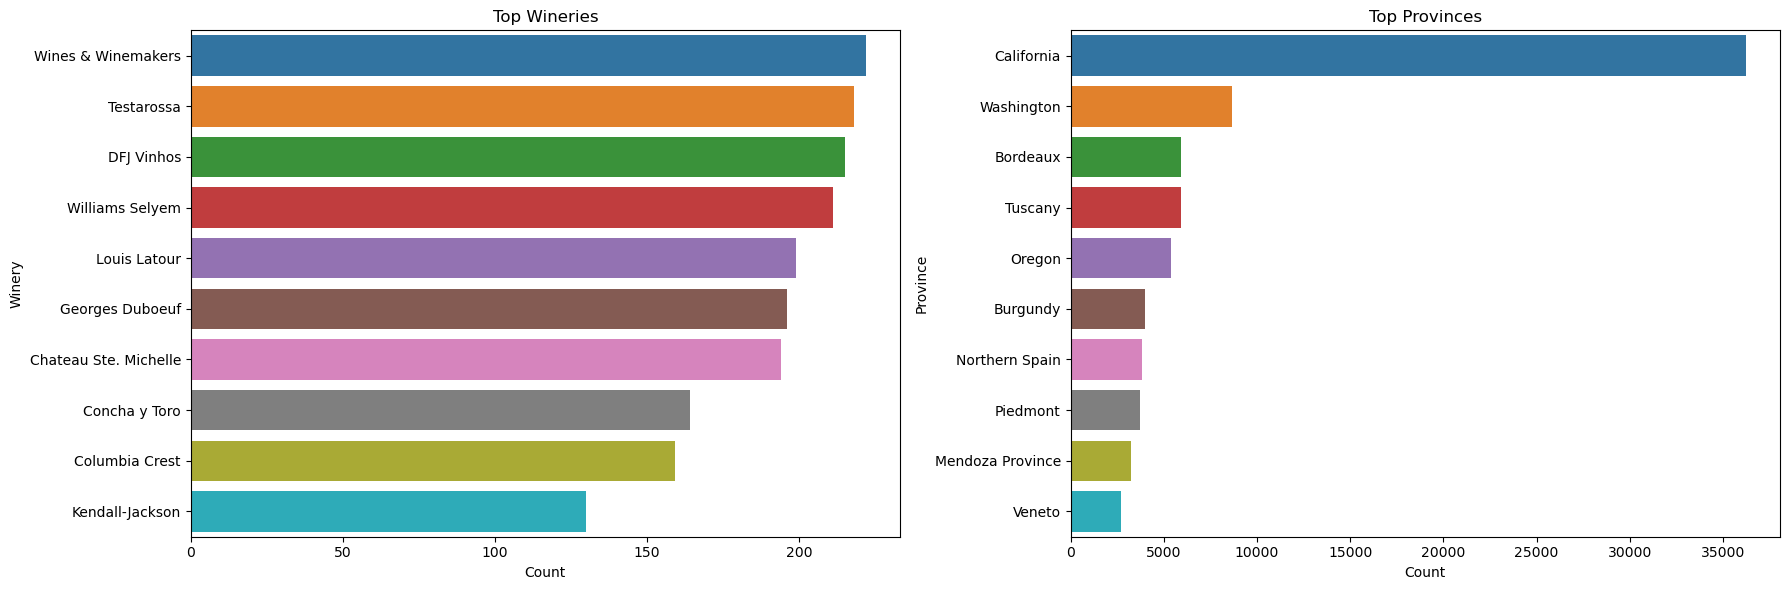

In [41]:
# use subplots to plot side by side bar plots of top wineries and top provinces 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# top 10 wineries subplot                                                                                     
sns.countplot(y='winery', data=data, order=data['winery'].value_counts().index[:10], ax=axes[0])
axes[0].set_title('Top Wineries')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Winery') 
# top 10 provinces                                                                                       
sns.countplot(y='province', data=data, order=data['province'].value_counts().index[:10],ax=axes[1])
axes[1].set_title('Top Provinces')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Province')
# adjust space between subplots            
plt.tight_layout()
plt.show()


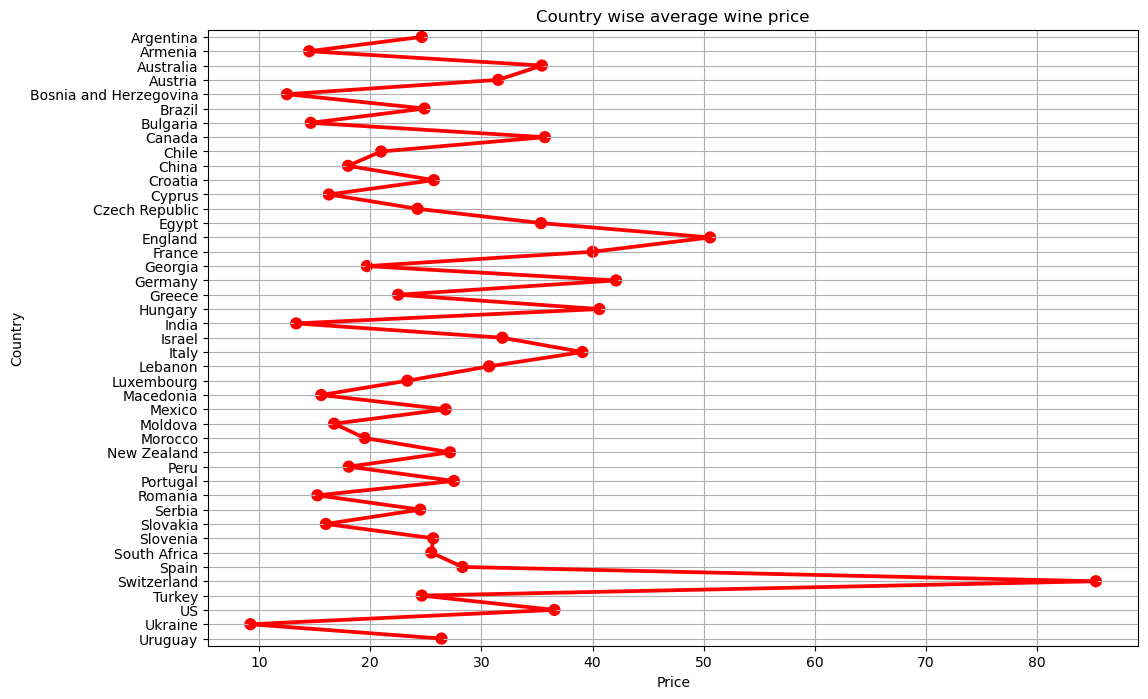

In [42]:
# average price for each country in each group 'country'
# resetting index after calculating mean price in each group
count = data.groupby('country')['price'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x ='price',y ='country', data=count,  color='r')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country')
plt.grid(True)
plt.show()


The average price of wine in 'Switzerland' is highest, followed by England.